<a href="https://colab.research.google.com/github/MFaiqKhan/100_days_of_ML/blob/main/BiLSTM_Time_Series_ETH_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series using LSTM.
Using LSTM Model to predict the Price of a Cryptocurrency Token using Binance API to get the previous data .

## Time Series:
Time series analysis is a method of analyzing a sequence of data points collected over an interval of time. In this type of analysis, data points are recorded at consistent intervals over a set period, rather than being collected intermittently or randomly. Time series data is a collection of observations obtained through repeated measurements over time, with one axis of the graph always representing time.

A time series is a sequence of numerical data points in successive order . In investing, for example, a time series may track the movement of a security's price over time . Time series data, sometimes called time-stamped data, is a time-ordered indexed sequence of data points. These data points typically track change over time and consist of successive measurements made over a fixed time interval from the same source.

Time series analysis is used in various fields, including finance, economics, and weather forecasting, to identify trends, seasonal patterns, and other characteristics of the data. This information can be used to make predictions, evaluate the impact of interventions, and understand underlying causes and relationships within the data.

## **Transforming data into suitable format for modeling using LSTM model**

CCXT Library : https://github.com/ccxt/ccxt

In [1]:
!pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.9 MB/s eta 0:00:00


The code below imports the **`ccxt`** library for accessing the Binance cryptocurrency exchange API and the **`pandas`** library for data manipulation. It then fetches historical OHLCV (Open, High, Low, Close, Volume) data for the **`ETHUSDT`** trading pair and converts the Unix timestamps to human-readable UTC dates

In [2]:
import ccxt
import pandas as pd

In [3]:
print(ccxt.exchanges) # Print all available Exchanges

['ace', 'alpaca', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bit2c', 'bitbank', 'bitbay', 'bitbns', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitforex', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitpanda', 'bitrue', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitvavo', 'bkex', 'bl3p', 'blockchaincom', 'btcalpha', 'btcbox', 'btcex', 'btcmarkets', 'btctradeua', 'btcturk', 'bybit', 'cex', 'coinbase', 'coinbaseprime', 'coinbasepro', 'coincheck', 'coinex', 'coinfalcon', 'coinmate', 'coinone', 'coinsph', 'coinspot', 'cryptocom', 'currencycom', 'delta', 'deribit', 'digifinex', 'exmo', 'fmfwio', 'gate', 'gateio', 'gemini', 'hitbtc', 'hitbtc3', 'hollaex', 'huobi', 'huobijp', 'huobipro', 'idex', 'independentreserve', 'indodax', 'kraken', 'krakenfutures', 'kucoin', 'kucoinfutures', 'kuna', 'latoken', 'lbank', 'lbank2', 'luno', 'lykke', 'mercado', 'mexc', 'mexc3', 'ndax', 'novadax', 'oceanex', 'okcoin', 'okex', 'okex5', 'okx', '

**Create an instance of the Binance exchange:**

In [4]:
ex = ccxt.binanceus()

**Fetch OHLCV data for the BTCUSDT trading pair with a daily timeframe and a limit of 1000 data points:**

In [5]:
df = pd.DataFrame(ex.fetch_ohlcv(symbol='ETHUSDT', timeframe='1d', limit=1000),
                  columns = ['unix', 'open', 'high', 'low', 'close', 'volume']
)

The **`fetch_ohlcv`** function returns a list of lists containing the Unix timestamps, open, high, low, close, and volume values. The **`pd.DataFrame`** function converts this data into a pandas DataFrame with specified column names.

Getting data from spot Market

In [6]:
df

,unix,open,high,low,close,volume
0,1600387200000,389.44,392.37,375.71,383.44,1012.25839
1,1600473600000,384.19,387.95,376.93,385.52,458.38101
2,1600560000000,385.26,385.26,364.95,371.08,1685.58119
3,1600646400000,370.29,376.49,330.92,340.01,1448.53818
4,1600732800000,340.88,347.13,335.97,343.97,935.34409
...,...,...,...,...,...,...
995,1686355200000,1838.78,1843.66,1717.83,1752.49,2557.59090
996,1686441600000,1752.13,1776.22,1740.01,1747.55,973.08010
997,1686528000000,1747.60,1757.44,1720.51,1741.56,1307.89590
998,1686614400000,1741.54,1761.39,1720.25,1739.62,1043.11810


**Convert Unix timestamps (in milliseconds) to UTC dates:**

In [7]:
df['date'] = pd.to_datetime(df.unix, unit='ms')
df

,unix,open,high,low,close,volume,date
0,1600387200000,389.44,392.37,375.71,383.44,1012.25839,2020-09-18
1,1600473600000,384.19,387.95,376.93,385.52,458.38101,2020-09-19
2,1600560000000,385.26,385.26,364.95,371.08,1685.58119,2020-09-20
3,1600646400000,370.29,376.49,330.92,340.01,1448.53818,2020-09-21
4,1600732800000,340.88,347.13,335.97,343.97,935.34409,2020-09-22
...,...,...,...,...,...,...,...
995,1686355200000,1838.78,1843.66,1717.83,1752.49,2557.59090,2023-06-10
996,1686441600000,1752.13,1776.22,1740.01,1747.55,973.08010,2023-06-11
997,1686528000000,1747.60,1757.44,1720.51,1741.56,1307.89590,2023-06-12
998,1686614400000,1741.54,1761.39,1720.25,1739.62,1043.11810,2023-06-13


 The **pd.to_datetime** function is used to convert the Unix timestamps to human-readable UTC dates, with the **unit='ms'** argument specifying that the input timestamps are in milliseconds

The resulting DataFrame **df** will contain the historical OHLCV data for the **ETHUSDT** trading pair, with an additional column for the UTC dates. This data can be used for further analysis, such as time series analysis, technical analysis, or trading strategy development.

## **Data Plotting**

Text(0.5, 1.0, 'ETH Daily Close Price Daily Timeframe')

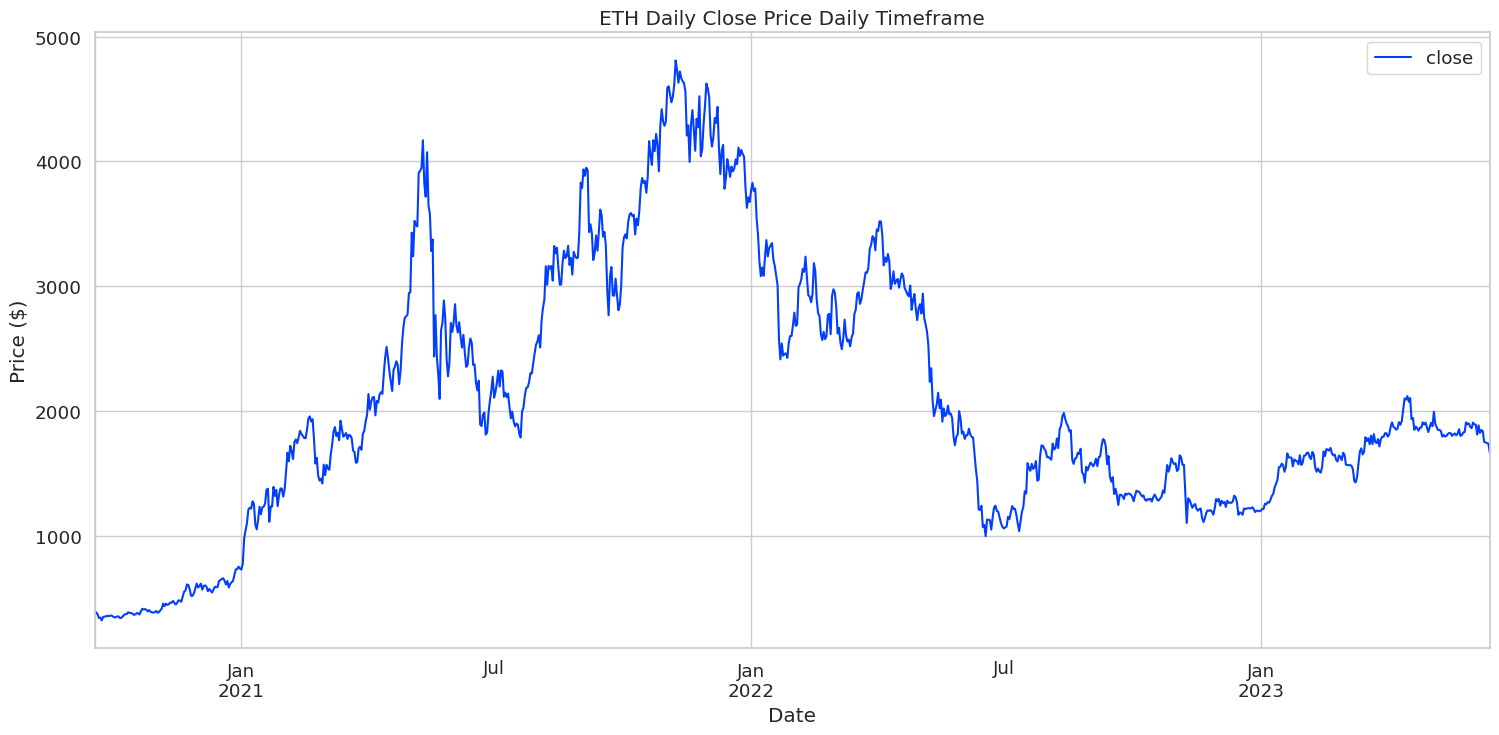

In [8]:
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

rcParams['figure.figsize'] = 18, 8
sns.set(style='whitegrid', palette='bright', font_scale=1.2)

ax = df.plot(x='date', y='close')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('ETH Daily Close Price Daily Timeframe')


The code imports the necessary libraries for plotting and customizes the plot appearance. It then creates a line chart of the daily closing price of ETHEREUM (ETH) using the data from the previously created DataFrame.

The `%matplotlib` inline magic command enables the display of plots directly within the Jupyter Notebook. `rcParams` is imported from `pylab` to customize the plot size. `matplotlib.pyplot` is imported for creating the plot, and `seaborn` is imported for additional styling.

`rcParams` is used to set the plot size to 14 inches wide and 8 inches tall. The sns.set() function customizes the plot appearance using a white grid background, a bright color palette, and a font scale of 1.2.

he `df.plot()` function creates a line chart with the 'date' column on the x-axis and the 'close' column on the y-axis. It returns a `matplotlib.axes.Axes` object, which is stored in the variable `ax`. The `set_xlabel(`), `set_ylabel()`, and `set_title()` methods of the `Axes` object are used to set the labels for the x-axis, y-axis, and title of the plot, respectively.

## **Pre-Processing the Data , scaling the price**

The code imports the MinMaxScaler class from the sklearn.preprocessing module and uses it to scale the 'close' price values of the ETH data to a range between 0 and 1

In [9]:
'''
The 'close' price values are extracted from the DataFrame and reshaped into a 2D array with a single column.
The -1 in the reshape() function indicates that the number of rows should be inferred from the input data,
while the 1 indicates that there should be one column.

means , 1000 rows which is inferred from input data as we give limit=1000 in dataframe and 1 column
'''

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler() # Create an instance of MinMaxScaler:

close_price = df.close.values.reshape(-1, 1) # Reshape the 'close' price values from the DataFrame
close_price ,len(close_price)



(array([[ 383.44],
        [ 385.52],
        [ 371.08],
        [ 340.01],
        [ 343.97],
        [ 320.59],
        [ 348.62],
        [ 351.04],
        [ 353.69],
        [ 357.85],
        [ 354.05],
        [ 359.28],
        [ 359.77],
        [ 352.53],
        [ 345.38],
        [ 345.84],
        [ 352.64],
        [ 353.41],
        [ 340.24],
        [ 341.21],
        [ 350.84],
        [ 365.87],
        [ 370.24],
        [ 373.28],
        [ 386.62],
        [ 380.86],
        [ 379.45],
        [ 376.86],
        [ 365.27],
        [ 368.66],
        [ 378.55],
        [ 379.05],
        [ 368.27],
        [ 391.34],
        [ 414.29],
        [ 408.13],
        [ 412.17],
        [ 405.98],
        [ 393.39],
        [ 403.3 ],
        [ 388.68],
        [ 386.81],
        [ 383.32],
        [ 386.8 ],
        [ 396.09],
        [ 383.01],
        [ 387.9 ],
        [ 402.07],
        [ 416.2 ],
        [ 455.89],
        [ 435.13],
        [ 454.8 ],
        [ 44

In [10]:
# Scale the 'close' price values using MinMaxScaler:

scaled_close = scalar.fit_transform(close_price)
scaled_close

array([[0.01400083],
       [0.01446418],
       [0.01124744],
       [0.00432611],
       [0.00520826],
       [0.        ],
       [0.00624412],
       [0.00678322],
       [0.00737355],
       [0.00830025],
       [0.00745374],
       [0.00861881],
       [0.00872796],
       [0.00711514],
       [0.00552236],
       [0.00562484],
       [0.00713964],
       [0.00731117],
       [0.00437735],
       [0.00459343],
       [0.00673866],
       [0.01008683],
       [0.01106032],
       [0.01173753],
       [0.01470922],
       [0.01342609],
       [0.01311199],
       [0.01253503],
       [0.00995317],
       [0.01070835],
       [0.0129115 ],
       [0.01302289],
       [0.01062147],
       [0.01576068],
       [0.02087315],
       [0.01950092],
       [0.02040089],
       [0.01902197],
       [0.01621735],
       [0.01842496],
       [0.01516812],
       [0.01475155],
       [0.0139741 ],
       [0.01474932],
       [0.01681882],
       [0.01390504],
       [0.01499436],
       [0.018

The fit_transform() method of the MinMaxScaler object scales the input data by applying the following formula:



```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In this case, the default range of (0, 1) is used, so max = 1 and min = 0. The scaled_close variable now contains the 'close' price values scaled between 0 and 1.

This scaling process is often used in machine learning and time series analysis to normalize the input data, reducing the impact of large differences in scale between features and improving the performance of certain algorithms



## **Dividing the sequence into shorter period time frame, here using a month of data as a sequence**

code defines a function **`get_train_test_sets()`** that splits the given scaled close price data into training and testing datasets for time series forecasting. The input data is first divided into sequences of a specified length **`(seq_len)`**, and then a specified fraction of these sequences is used for training, while the remaining sequences are used for testing.

In [11]:
import numpy as np

seq_len = 30 # This variable sets the length of each sequence to be 30 time steps which is one month

def split_into_sequences(data, seq_len):
  n_seq = len(data) - seq_len + 1 # 971
  return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

split_into_sequences(scaled_close, seq_len)

array([[[0.01400083],
        [0.01446418],
        [0.01124744],
        ...,
        [0.01253503],
        [0.00995317],
        [0.01070835]],

       [[0.01446418],
        [0.01124744],
        [0.00432611],
        ...,
        [0.00995317],
        [0.01070835],
        [0.0129115 ]],

       [[0.01124744],
        [0.00432611],
        [0.00520826],
        ...,
        [0.01070835],
        [0.0129115 ],
        [0.01302289]],

       ...,

       [[0.3295129 ],
        [0.33312393],
        [0.33480804],
        ...,
        [0.31897831],
        [0.31787784],
        [0.31654348]],

       [[0.33312393],
        [0.33480804],
        [0.3343937 ],
        ...,
        [0.31787784],
        [0.31654348],
        [0.31611131]],

       [[0.33480804],
        [0.3343937 ],
        [0.32965993],
        ...,
        [0.31654348],
        [0.31611131],
        [0.30004767]]])

The variable n_seq represents the number of sequences that can be generated from the input data with the specified sequence length (seq_len). In the case of having 1000 data points and a seq_len of 30, you will get an n_seq of 971.

The value of n_seq (971) indicates that there are 971 possible sequences of length 30 that can be created from the given 1000 data points. Each sequence is created by taking a sliding window of size 30 and moving it one step at a time through the data. The purpose of generating these sequences is to create input-output pairs for training and testing time series forecasting models, such as LSTM networks.

For example, if you have a time series [a, b, c, d, e, f] and a seq_len of 3, n_seq would be 4, and the generated sequences would be [[a, b, c], [b, c, d], [c, d, e], [d, e, f]]. These sequences are then used to create input-output pairs for modeling: ([a, b], c), ([b, c], d), ([c, d], e), ([d, e], f).

The impact of n_seq on the model training and evaluation depends on the specific problem you are trying to solve and the model architecture. A larger n_seq value means more input-output pairs for the model to learn from, which can improve its performance. However, it also means a larger dataset, which can lead to longer training times and increased memory usage. Additionally, the choice of seq_len can affect the model's ability to capture long-term dependencies and patterns in the data.

given a time series [a, b, c, d, e, f] and a seq_len of 3, you can calculate n_seq as follows:



```
n_seq = len(data) - seq_len + 1
n_seq = 6 - 3 + 1
n_seq = 4

```
This means that there are 4 possible sequences of length 3 that can be created from the given time series.

Now, let's generate the sequences using a sliding window of size 3:

`([a, b], c), ([b, c], d), ([c, d], e), ([d, e], f)`


The input-output pairs are created by taking the first seq_len - 1 elements of each sequence as the input, and the last element of each sequence as the output. This way, the model learns to predict the next value in the sequence based on the previous values.

Regarding the context you provided, the sequence-to-sequence (seq2seq) prediction is a more general case where both input and output sequences can have varying lengths. In this case, you often need to pad the input sequences with zeros and use a mask input layer to handle the varying lengths. The seq2seq approach is commonly used in tasks such as machine translation, multi-step time series forecasting, text summarization, and program execution, where the length of the input and output sequences may not be the same or known a-priori.

The return statement in the provided function is responsible for creating and returning an array of sequences

`return np.array([data[i:(i+seq_len)] for i in range(n_seq)])`

Given the time series `[a, b, c, d, e, f]` and a `seq_len` of 3, the `n_seq` is 4, as we calculated earlier. The return statement creates a list comprehension that iterates over a range from 0 to `n_seq - 1` (0 to 3 in this case). In each iteration, it takes a slice of the `data` array starting at index `i` and ending at index `i + seq_len`.

Using the example:

When i = 0, the slice is [a, b, c].

When i = 1, the slice is [b, c, d].

When i = 2, the slice is [c, d, e].

When i = 3, the slice is [d, e, f].

The list comprehension collects these slices into a list:

[[a, b, c], [b, c, d], [c, d, e], [d, e, f]]

Finally, the **np.array()** function converts this list of sequences into a NumPy array and returns it.

In [12]:
def get_train_test_sets(data, seq_len, train_frac):
  sequences = split_into_sequences(data, seq_len)
  # sequences.shape =  (971, 30, 1) having 3 dim
  n_train =  int(sequences.shape[0] * train_frac) # 873 if train_frac = 0.9, int(971 * 0.9) = 873
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test



x_train, y_train, x_test, y_test = get_train_test_sets(scaled_close, seq_len, train_frac=0.9)
x_train[-1], x_train.shape, x_train.ndim


(array([[0.30075829],
        [0.2962963 ],
        [0.27289252],
        [0.26564818],
        [0.27133762],
        [0.26609149],
        [0.26393066],
        [0.27512687],
        [0.30168277],
        [0.29360974],
        [0.30581731],
        [0.30531163],
        [0.30309288],
        [0.30801378],
        [0.29831678],
        [0.29469684],
        [0.29624729],
        [0.28683766],
        [0.28392611],
        [0.29428249],
        [0.29245804],
        [0.28618941],
        [0.29947071],
        [0.29554112],
        [0.27812752],
        [0.27762184],
        [0.27712953],
        [0.27735452],
        [0.27637213]]),
 (873, 29, 1),
 3)

The get_train_test_sets function takes three arguments: data, seq_len, and train_frac. Using the example time series [a, b, c, d, e, f] and a seq_len of 3, I'll explain the variables inside the function:

n_train: The number of training sequences. It is calculated by multiplying the total number of sequences (sequences.shape[0]) by the train_frac (a float value between 0 and 1). For example, if train_frac is 0.8, then n_train would be int(4 * 0.8) = 3.

x_train: The input features for the training set. It is created by taking the first n_train sequences and excluding the last element of each sequence. In our example, if n_train is 3, the first 3 sequences are [[a, b, c], [b, c, d], [c, d, e]]. After removing the last element from each sequence, we get [[a, b], [b, c], [c, d]].

y_train: The output labels for the training set. It is created by taking the last element of the first n_train sequences. In our example, the last elements are [c, d, e].

x_test: The input features for the test set. It is created by taking the remaining sequences (after the first n_train sequences) and excluding the last element of each sequence. In our example, the remaining sequence is [[d, e, f]]. After removing the last element, we get [[d, e]].

y_test: The output labels for the test set. It is created by taking the last element of the remaining sequences (after the first n_train sequences). In our example, the last element is [f].

Please note that the provided context is about the train_test_split function from the sklearn.model_selection module, which is not directly related to the custom get_train_test_sets function you provided. The custom function you provided is specifically designed for splitting time series data into subsequences for training and testing, while the train_test_split function from sklearn is for general-purpose splitting of data arrays or matrices.

In the line x_train = sequences[:n_train, :-1, :], the part [:n_train, :-1, :] is called slicing, which is a way to extract a portion of an array. It is used to select specific elements from the sequences array. Let's break it down:

**`:n_train`**: This slice selects all elements from the beginning of the array up to, but not including, the element at index n_train. Essentially, it takes the first n_train elements. If n_train is 3, this would select the first 3 sequences.

**`:-1`**: This slice selects all elements from the beginning of each subsequence up to, but not including, the last element. It removes the last element from each subsequence.

**`:`**: This slice selects all elements along the third dimension of the array (if it exists). In this case, it keeps all elements along that dimension unchanged.
Putting it all together, sequences[:n_train, :-1, :] selects the first n_train sequences and removes the last element from each of those sequences

Using the example time series [a, b, c, d, e, f] and a seq_len of 3, the sequences array is:



```
[
  [a, b, c],
  [b, c, d],
  [c, d, e],
  [d, e, f]
]

```

Let's assume n_train is 3. Now, I'll explain the three lines you provided:

y_train = sequences[:n_train, -1, :]: This line extracts the last element of the first n_train sequences. The slice :n_train selects the first 3 sequences, and the slice -1 selects the last element of each sequence. In this case, y_train will be [c, d, e].

x_test = sequences[n_train:, :-1, :]: This line extracts all sequences starting from index n_train to the end of the array and removes the last element of each sequence. The slice n_train: selects the remaining sequence [[d, e, f]], and the slice :-1 removes the last element, resulting in x_test being [[d, e]].

y_test = sequences[n_train:, -1, :]: This line extracts the last element of all sequences starting from index n_train to the end of the array. The slice n_train: selects the remaining sequence [[d, e, f]], and the slice -1 selects the last element, resulting in y_test being [f].

In summary, the given function splits the input time series data into training and test sets as follows:

x_train: [[a, b], [b, c], [c, d]]

y_train: [c, d, e]

x_test: [[d, e]]

y_test: [f]



## **Creating LSTM Model**

In [36]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Dense, Activation, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

# fraction of the input to drop; helps prevent overfitting, in each iteration .
dropout = 0.2
window_size = seq_len -1

# building a 3-Layer LSTM RNN (BIDIRECTIONAL)
model = keras.Sequential()

# adding LSTM layer to sequential model
model.add(
    LSTM(window_size, return_sequences = True, input_shape = (window_size, x_train.shape[-1]))
)
# adds a dropout layer to the model with the specified dropout rate
model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True))
)

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
)

model.add(Dense(units=1))
model.add(Activation('linear'))

 imports several classes and functions from the Keras package of the TensorFlow library. Specifically, it imports the following:

Bidirectional: a Keras layer that creates a bidirectional wrapper for an RNN layer, which means that it processes input sequences both forwards and backwards and concatenates the output of both directions at each time step.

Dropout: a Keras layer that applies dropout regularization to the input.

Dense: a Keras layer that creates a fully connected dense layer.

Activation: a Keras layer that applies an activation function to the input.

LSTM: a Keras layer that creates a Long Short-Term Memory (LSTM) layer.

CuDNNLSTM: a Keras layer that creates an LSTM layer that uses the CuDNN kernel when available.

The code then defines a Sequential model using these layers and compiles it.

Bidirectional and CuDNNLSTM are both Keras layers for building recurrent neural networks (RNNs) that are commonly used in machine/deep learning applications. Here is some information about each layer based on the context of the search results:

Bidirectional: This layer creates a bidirectional RNN by processing input sequences both forwards and backwards and concatenating the output of both directions at each time step. This can be useful for capturing long-term dependencies and context in a sequence of data. According to [5], the Bidirectional layer can be used with the CuDNNLSTM layer, among others, to build a bidirectional LSTM network. The code snippet in [5] uses the Bidirectional layer with CuDNNLSTM to create a model for predicting a time series data.

CuDNNLSTM: This layer is a specific implementation of the LSTM layer that is optimized for running on NVIDIA GPUs using the CUDA Deep Neural Network library (cuDNN). According to [3], CuDNNLSTM can be used with variable sequence length in each batch and is faster than the basic LSTM implementation on GPUs. [4] suggests using CuDNNLSTM for plain LSTM and LSTMBlockFused if you don’t have GPU access. The code snippet in [5] uses CuDNNLSTM with Bidirectional to create a model for predicting a time series data

Sequential is a class from the Keras package of TensorFlow that is used for defining a linear stack of layers for building neural networks. It is called "sequential" because it involves adding layers to the model one by one in a linear manner, from input to output. The Sequential class provides an easy-to-use API for defining and configuring a neural network model, especially for beginners.

In the given code, the LSTM layer is added to the Sequential model with the following parameters:

window_size: The number of time steps to consider for each input sequence. It is calculated as seq_len - 1, where seq_len is the length of the input sequence.

return_sequences=True: This parameter is set to True to return the output at each time step, which is necessary for stacking multiple LSTM layers.

input_shape=(window_size, x_train.shape[-1]): This parameter specifies the shape of the input data, which is a 3D tensor with shape (batch_size, window_size, input_dim).

The input_dim is the number of features in the input data, which is obtained from the last dimension of the x_train array.

The LSTM layer is a recurrent layer that is used for processing sequential data, such as time series or natural language. It has the following parameters:

units: The number of LSTM units in the layer, which determines the dimensionality of the output space.

dropout: Fraction of the input units to drop, which helps prevent overfitting by randomly setting input units to 0 during training.
recurrent_dropout: Fraction of the recurrent units to drop, which helps prevent overfitting by randomly setting recurrent units to 0 during training.

return_sequences: Boolean value indicating whether to return the output at each time step or only the output at the last time step.

input_shape: Shape of the input data, which is a 3D tensor with shape (batch_size, timesteps, input_dim).

In the given code, the LSTM layer is used with return_sequences=True to return the output at each time step, which is necessary for stacking multiple LSTM layers. The input_shape parameter is set to (window_size, x_train.shape[-1]), which specifies the shape of the input data as a 3D tensor with shape (batch_size, window_size, input_dim), where input_dim is the number of features in the input data.

In the given code, window_size refers to the number of time steps (or sequence length) that the LSTM model will use as input to make a prediction.

Specifically, it is set to seq_len - 1, where seq_len is the length of the input sequence.

This means that the LSTM model will use a sliding window of size window_size to process the input sequence, where each window starts at time step t and ends at time step t + window_size - 1.

The prediction for time step t + window_size will be based on the input sequence within the window.

For example, if we have a time series with 10 time steps and we set window_size to 3, the LSTM model will use a sliding window of size 3 to process the input sequence as follows:

For the first window, the input will be the first 3 time steps (t=1,2,3) and the prediction will be for time step 4.

For the second window, the input will be time steps 2, 3, and 4 (t=2,3,4) and the prediction will be for time step 5.

For the third window, the input will be time steps 3, 4, and 5 (t=3,4,5) and the prediction will be for time step 6.

And so on, until the last window, which will have input time steps 8, 9, and 10 (t=8,9,10) and predict for time step 11.

Note that the value of window_size can affect the performance of the LSTM model. A larger window_size can capture more long-term dependencies in the input sequence but may also lead to overfitting, while a smaller window_size may not capture enough context and lead to underfitting. Therefore, it is important to choose an appropriate value for window_size based on the characteristics of the input sequence and the problem at hand.

Dropout, in the context of neural networks, refers to dropping out a fraction of the input or hidden nodes during training to prevent overfitting. Specifically, it refers to randomly dropping some nodes during training, effectively removing the connections to the rest of the network, thus creating a new network architecture out of the parent network. The fraction of nodes to be dropped is called the dropout rate, which is typically set between 0.2 and 0.5. A higher dropout rate results in a more sparse model, which is more resistant to overfitting. Dropout is implemented by multiplying the input to a layer with a mask of independent Bernoulli variables, with the probability of each variable being equal to the dropout rate. During feed-forward propagation, the mask ensures that only a few units are kept according to the keep probability of a dropout. By using dropout, the network is trained on a smaller neural network in each iteration, which prevents co-adaptation and improves the generalization of the network. [3]

In the given code, dropout = 0.2 refers to the dropout rate, which means that during training, 20% of the input or hidden nodes will be randomly dropped out at each iteration. This helps to prevent overfitting and improve the generalization of the model.

### why 2 dropout layers ?

In the given code, two dropout layers are used to prevent overfitting and improve the generalization of the model. The dropout rate is set to 0.2, which means that 20% of the input or hidden nodes will be randomly dropped out at each iteration during training.

The first dropout layer is added after the first LSTM layer. This layer is used to randomly drop out a fraction of the input or hidden nodes of the LSTM layer, which helps to prevent overfitting and improve the generalization of the model.

The second dropout layer is added after the Bidirectional LSTM layer. This layer is used to randomly drop out a fraction of the input or hidden nodes of the Bidirectional LSTM layer, which also helps to prevent overfitting and improve the generalization of the model.

Using one dropout layer may not be sufficient to prevent overfitting in complex models like LSTM networks. Multiple dropout layers with different dropout rates can be used to improve the generalization of the model and prevent overfitting.



#### why do we have window_size * 2 in first BiLSTM ?
In the given code, a Bidirectional LSTM layer is used twice in the model. The first BiLSTM layer has (window_size * 2) neurons, while the second BiLSTM layer has window_size neurons. Here's an explanation of why we have window_size * 2 in the first BiLSTM and normal in the second BiLSTM:

The first BiLSTM layer with (window_size * 2) neurons is used to capture more complex patterns in the input data. By doubling the number of neurons, the model can learn more complex representations of the input data and potentially improve the accuracy of the model.

The second BiLSTM layer with window_size neurons is used to reduce the dimensionality of the output from the first BiLSTM layer. This helps to prevent overfitting and improve the generalization of the model. By reducing the dimensionality of the output, the model can focus on the most important features in the input data and discard the less important ones.

In summary, the first BiLSTM layer with (window_size * 2) neurons is used to capture more complex patterns in the input data, while the second BiLSTM layer with window_size neurons is used to reduce the dimensionality of the output and prevent overfitting.

 it is a common practice to use a multiple of the window size to set the number of neurons in the LSTM layer. However, the choice of the number of neurons in the layer is usually based on experimentation and tuning.

# Model Training and Evaluation

In [41]:
batch_size = 24

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)

history = model.fit(
    x_train, y_train, epochs = 16, batch_size = batch_size, shuffle = False, validation_split = 0.3
)

Epoch 1/16
26/26 [==============================] - 16s 184ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 2/16
26/26 [==============================] - 2s 87ms/step - loss: 0.0068 - val_loss: 7.8610e-04
Epoch 3/16
26/26 [==============================] - 3s 101ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 4/16
26/26 [==============================] - 3s 128ms/step - loss: 0.0094 - val_loss: 6.5702e-04
Epoch 5/16
26/26 [==============================] - 2s 82ms/step - loss: 0.0118 - val_loss: 0.0034
Epoch 6/16
26/26 [==============================] - 2s 82ms/step - loss: 0.0249 - val_loss: 7.9552e-04
Epoch 7/16
26/26 [==============================] - 2s 82ms/step - loss: 0.0349 - val_loss: 0.0388
Epoch 8/16
26/26 [==============================] - 2s 89ms/step - loss: 0.0311 - val_loss: 0.0263
Epoch 9/16
26/26 [==============================] - 3s 135ms/step - loss: 0.0147 - val_loss: 0.0067
Epoch 10/16
26/26 [==============================] - 2s 93ms/step - loss: 0.0121 - val_loss:

The compile() function is used to specify the optimizer and the loss function for the model. The fit() function is then used to train the model using the training data (x_train and y_train). The epochs parameter specifies the number of times the training data should be iterated over, and the batch_size parameter specifies the number of samples to use in each training iteration. The shuffle parameter specifies whether to shuffle the training data before each epoch, and the validation_split parameter specifies the fraction of the training data to use for validation.

To generate a graph of the loss and validation, we can use the history object returned by the fit() function. The history object contains the training and validation loss values for each epoch. We can use the matplotlib library to plot the loss and validation curves. Here is an example code snippet to generate the graph

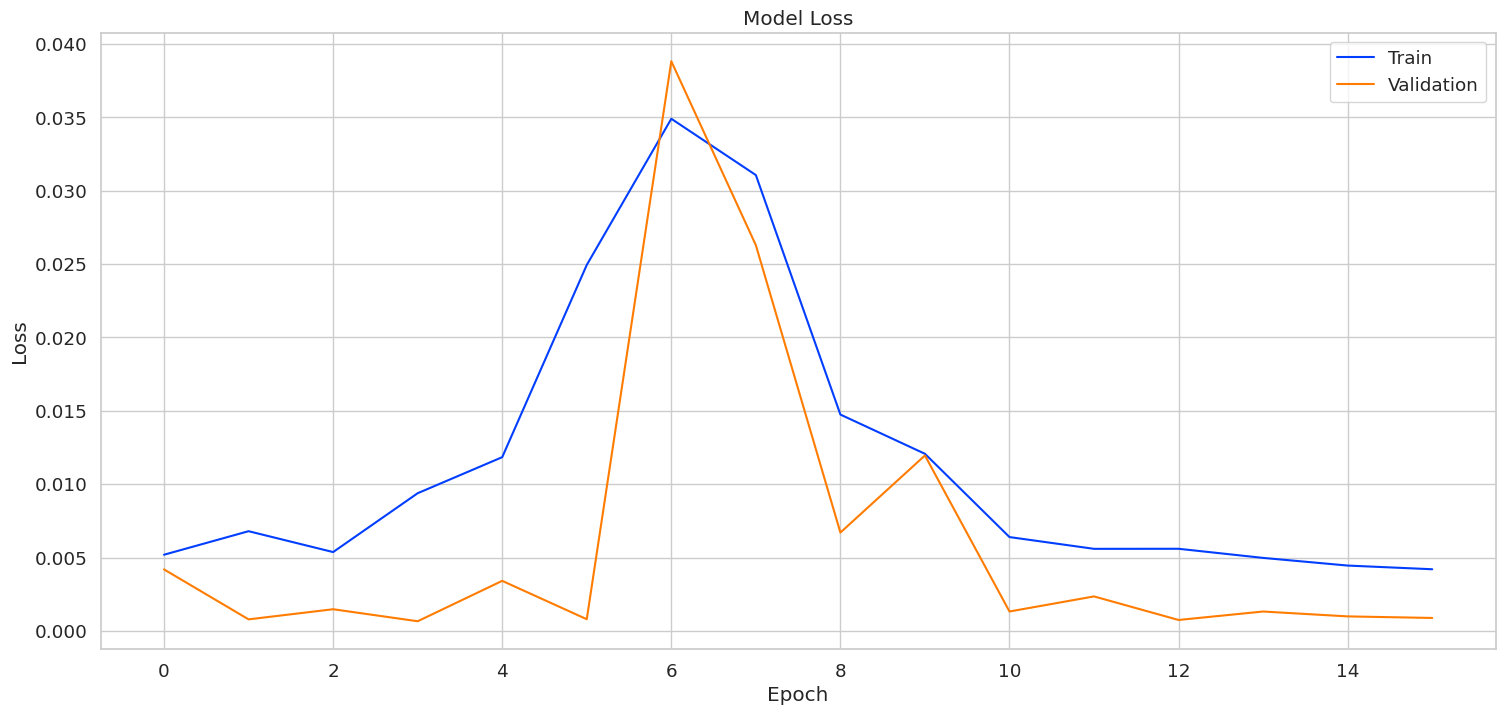

In [42]:



# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

4/4 [==============================] - 2s 20ms/step


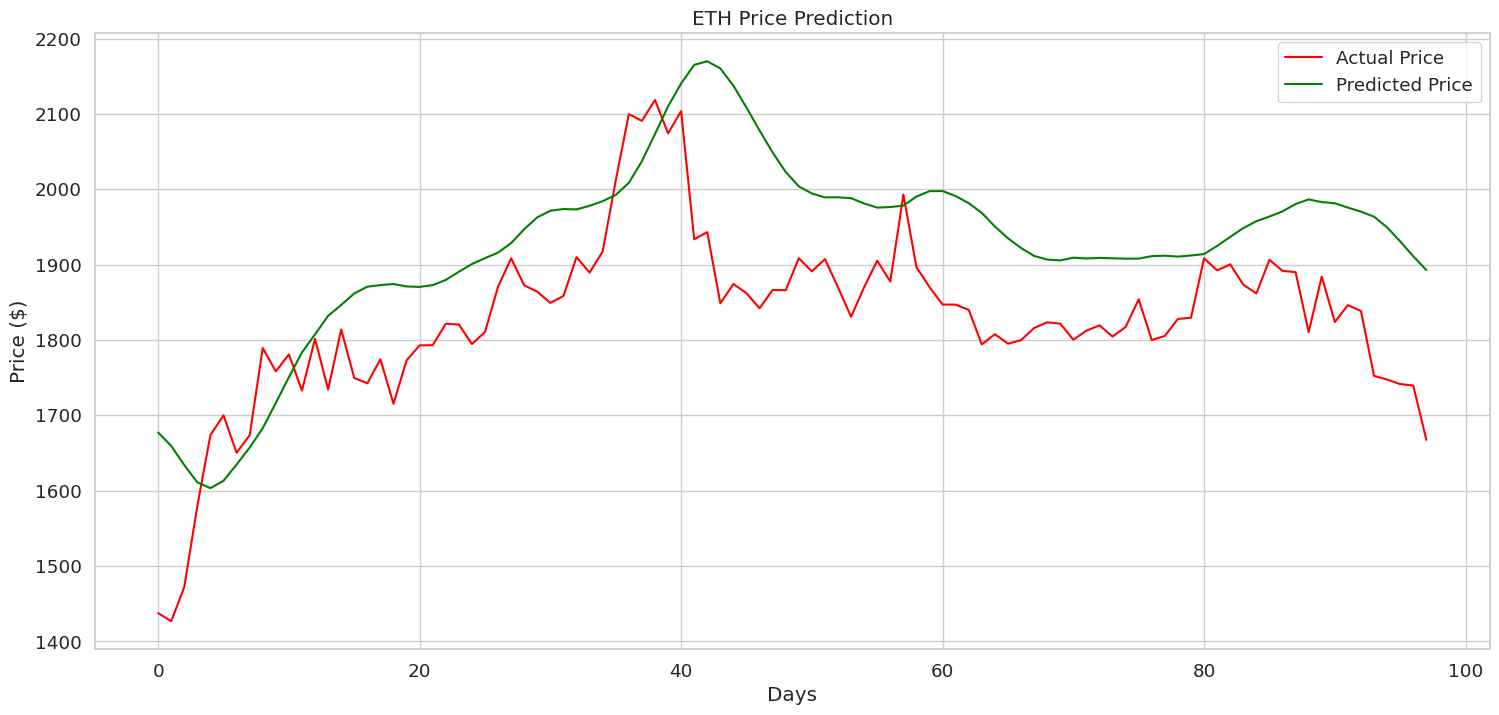

In [43]:

# create a MinMaxScaler object
scaler = MinMaxScaler()

close_price = df.close.values.reshape(-1, 1) # Reshape the 'close' price values from the DataFrame

scaled_close = scaler.fit_transform(close_price) # Fit the scaler on the training data and transform the data

def get_train_test_sets(data, seq_len, train_frac):
  sequences = split_into_sequences(data, seq_len)
  # sequences.shape =  (971, 30, 1) having 3 dim
  n_train =  int(sequences.shape[0] * train_frac) # 873 if train_frac = 0.9, int(971 * 0.9) = 873
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test


y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Price', color='red')
plt.plot(y_pred_orig, label='Predicted Price', color='green')

plt.title('ETH Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show();


generate predictions for a time series using an LSTM neural network. The first step is to generate predictions for the test data using the model.predict(x_test) function. The predicted values are then transformed back to their original scale using the scaler.inverse_transform() function. This is done to get the absolute price data in dollars as the original data was normalized.

The next step is to plot the actual and predicted values using the matplotlib library. The actual values are plotted in orange, and the predicted values are plotted in green. The plt.title() function is used to set the title of the plot, and plt.xlabel() and plt.ylabel() functions are used to set the labels for the x and y axes, respectively. Finally, the plt.legend() function is used to display the legend for the plot.

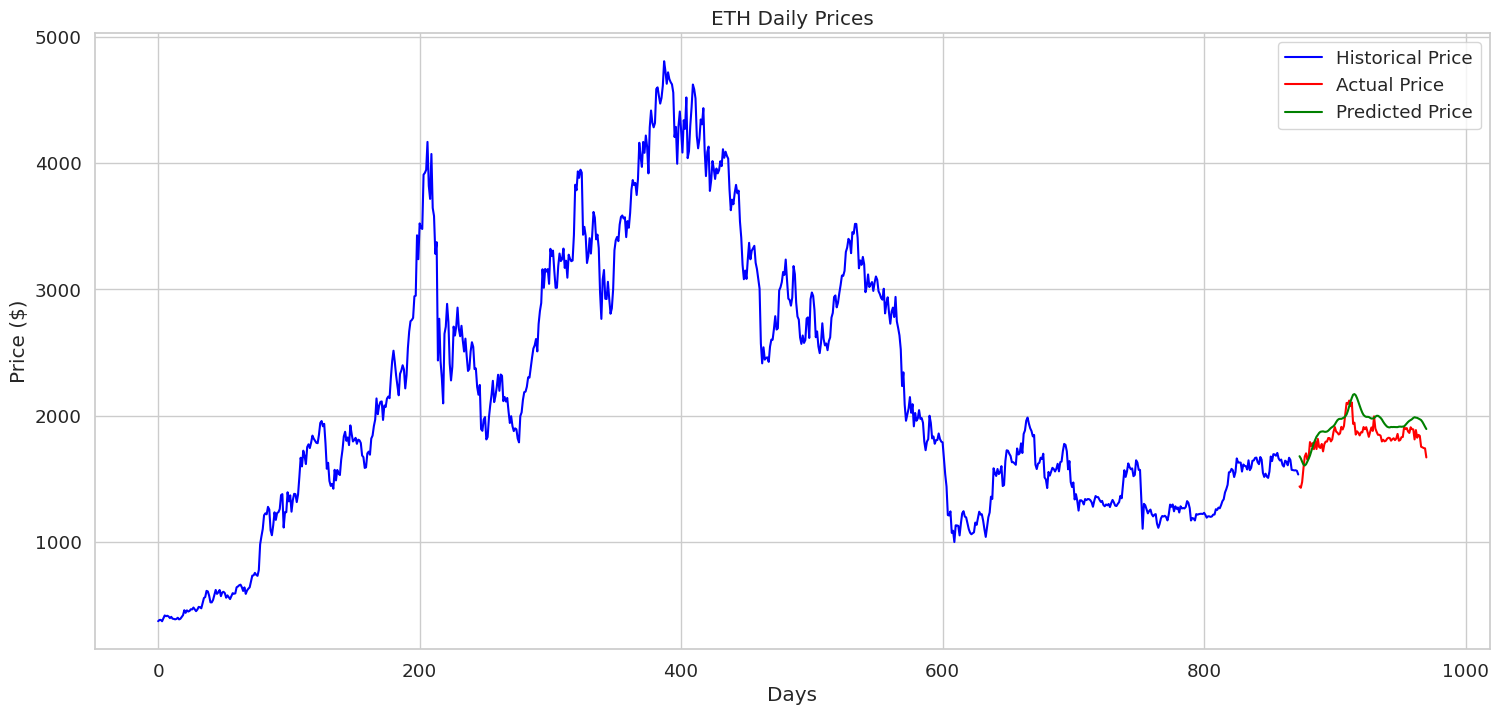

In [44]:
# plot for whole range of data
plt.plot(np.arange(0, len(y_train)), scaler.inverse_transform(y_train), color='blue', label='Historical Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, color='red', label='Actual Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred_orig)), y_pred_orig, color='green', label='Predicted Price')

plt.title('ETH Daily Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show();

28/28 [==============================] - 1s 34ms/step


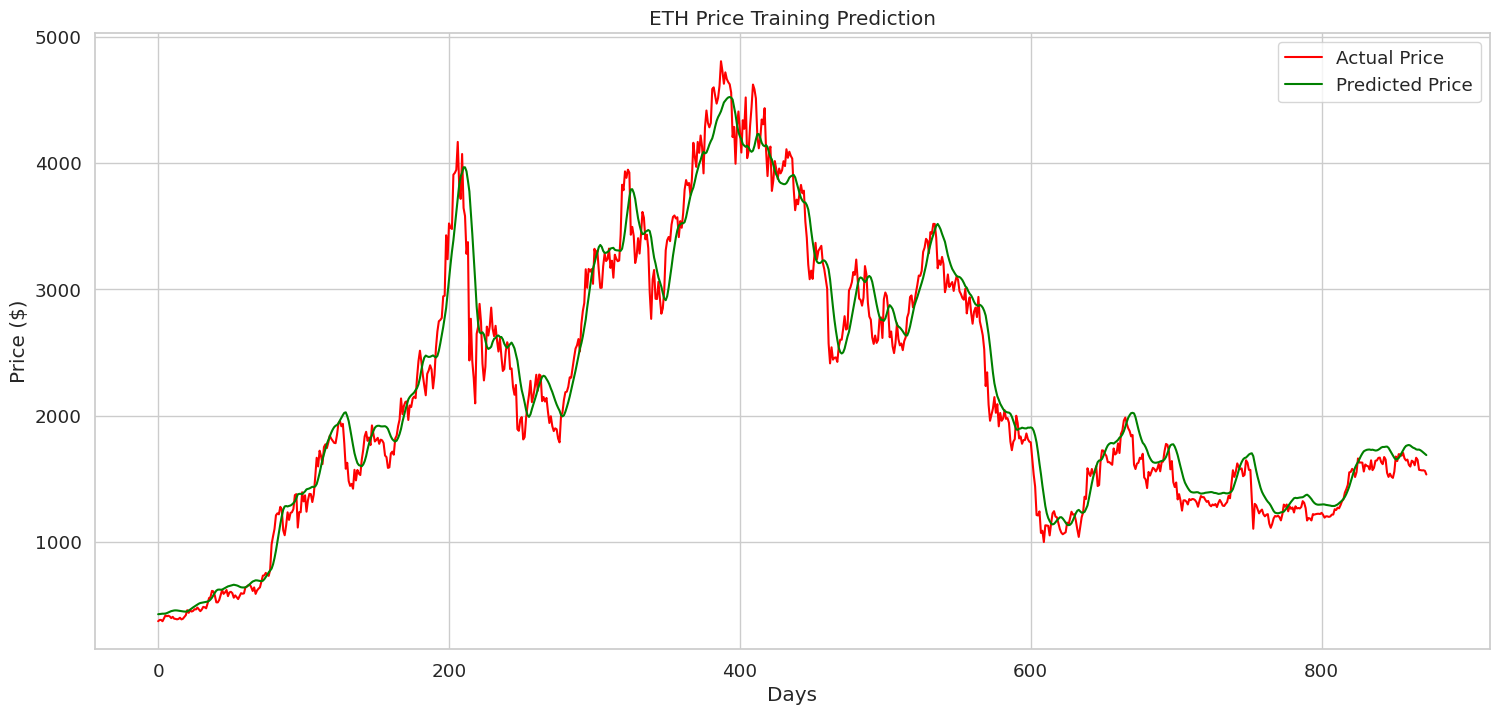

MSE: 41136.821941688206


In [48]:
from sklearn.metrics import mean_squared_error

# predict on the training data
y_train_pred = model.predict(x_train)

# invert the scaler to get the absolute price data
y_train_orig = scaler.inverse_transform(y_train)
y_train_pred_orig = scaler.inverse_transform(y_train_pred)

# plot the predicted values against the actual values
plt.plot(y_train_orig, label='Actual Price', color='red')
plt.plot(y_train_pred_orig, label='Predicted Price', color='green')
plt.title('ETH Price Training Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.show()

# compute the performance metric
mse = mean_squared_error(y_train_orig, y_train_pred_orig)
print('MSE:', mse)


1/1 [==============================] - 0s 36ms/step


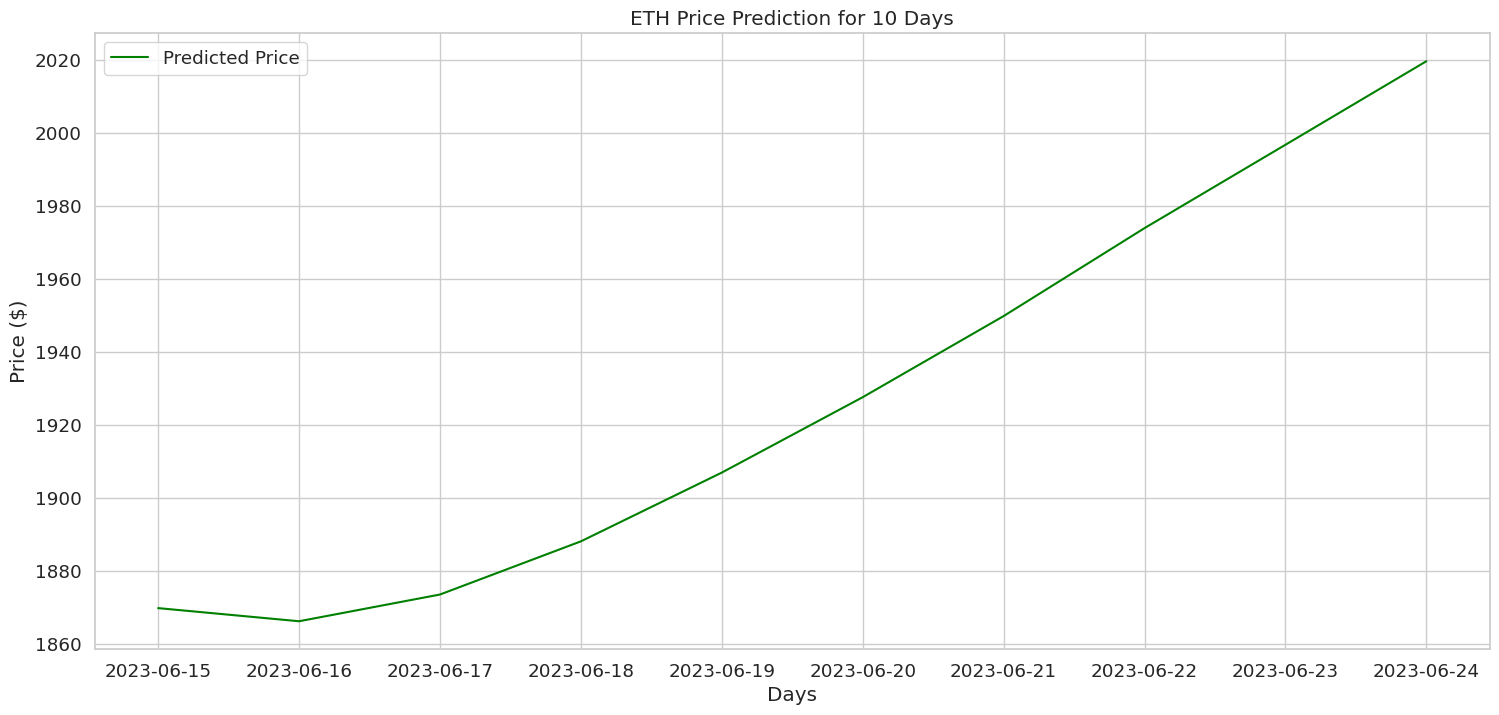

In [55]:
# predicting the price after 10 days in the future.

n_future_days = 10

last_date = df['date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=n_future_days + 1, freq='D')[1:]


# Create the initial sequence using the last `seq_len - 1` prices from the training data
initial_sequence = scaled_close[-(seq_len - 1):]

# Initialize an empty array to store future predictions
y_future = np.empty((n_future_days, 1))

# Create the initial sequence using the last `seq_len - 1` prices from the training data
initial_sequence = scaled_close[-(seq_len - 1):]

# Initialize an empty array to store future predictions
y_future = np.empty((n_future_days, 1))

# Predict future prices one by one
for i in range(n_future_days):
    x_future = initial_sequence[-(seq_len - 1):].reshape(1, window_size, 1)
    y_future[i] = model.predict(x_future)

    # Update the sequence with the predicted price
    initial_sequence = np.concatenate((initial_sequence, y_future[i].reshape(-1, 1)), axis=0)


y_future_orig = scaler.inverse_transform(y_future)


plt.plot(future_dates, y_future_orig, label='Predicted Price', color='green')

plt.title('ETH Price Prediction for 10 Days')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show()



# Obviously it's not that accurate

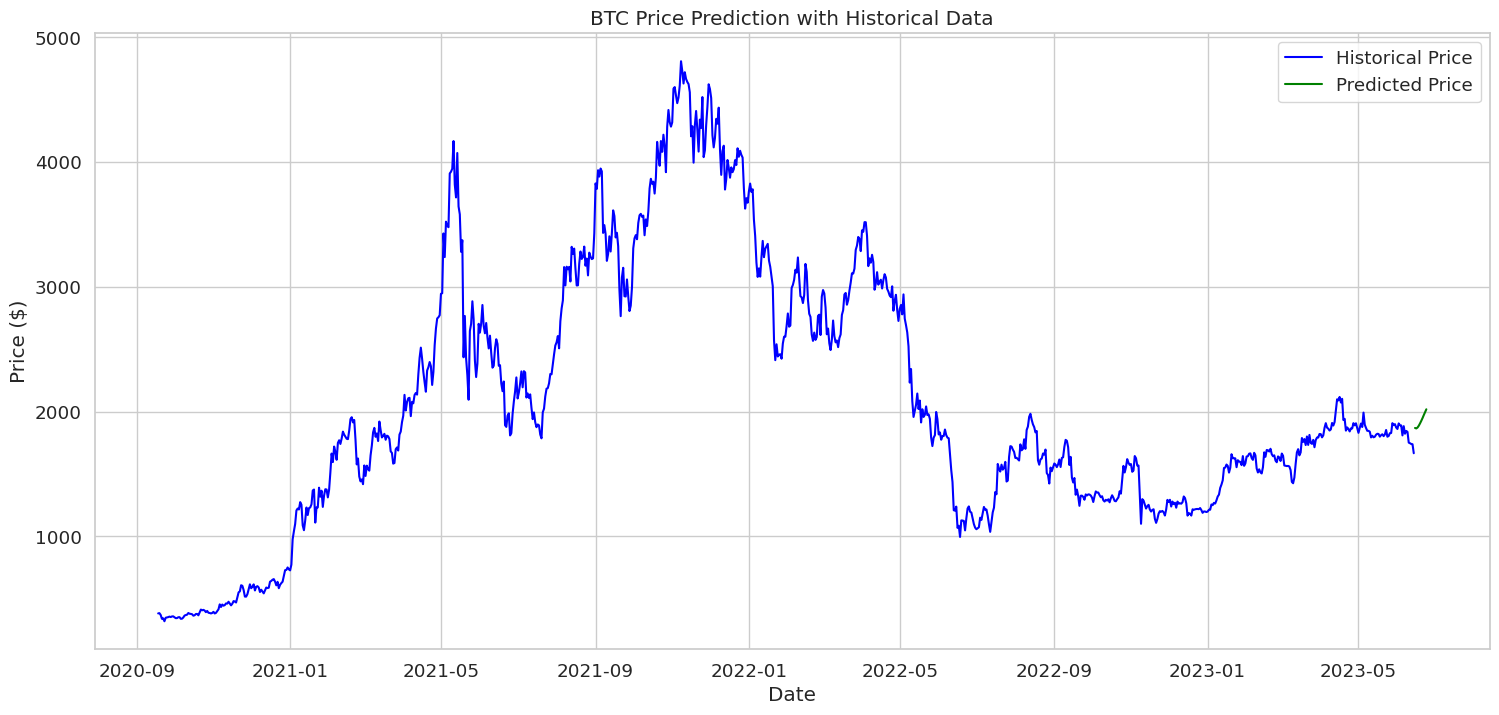

In [50]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(df['date'], df['close'], label='Historical Price', color='blue')

# Plot predicted future prices
plt.plot(future_dates, y_future_orig, label='Predicted Price', color='green')

# Add labels, title, and legend
plt.title('BTC Price Prediction with Historical Data')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

# Display the plot
plt.show()
